# CHAPTER 17: Adaptive Gradient Methods

### This code runs simulations for Examples 5 and 7 and generates figures 2, 3, 5 and 7 from Chapter 17: Adaptive Gradient Methods (vol I)
TEXT: A. H. Sayed, INFERENCE AND LEARNING FROM DATA, Cambridge University Press, 2022.

<div style="text-align: justify">
DISCLAIMER:  This computer code is  provided  "as is"   without  any  guarantees.
Practitioners  should  use it  at their own risk.  While  the  codes in  the text 
are useful for instructional purposes, they are not intended to serve as examples 
of full-blown or optimized designs. The author has made no attempt at optimizing 
the codes, perfecting them, or even checking them for absolute accuracy. In order 
to keep the codes at a level  that is  easy to follow by students, the author has 
often chosen to  sacrifice  performance or even programming elegance in  lieu  of 
simplicity. Students can use the computer codes to run variations of the examples 
shown in the text. 
</div>

The Jupyter notebook and python codes are developed by Semanur Avşar 

Required Libraries:

1. numpy
2. matplotlib
3. tqdm

Required Functions:

1. generate_logistic
2. logistic_minimizer
3. hadamard_product

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
from generate_logistic import generate_logistic
from logistic_minimizer import logistic_minimizer
from hadamard_product import hadamard_product

## Saddle points

There is a second motivation for adaptive gradient methods, which is helpful for nonconvex optimization problems. 
Although we have focused mainly on *convex* risks in our treatment so far in the text, the various stochastic algorithms from the previous chapter and this chapter can also be applied to the "minimization" of nonconvex risks (which we will study in greater detail in  Chapter $24$. Some challenges arise in this case,  such as the presence of local minima, local maxima, and saddle points. These situations are illustrated in Figs. $17.2$ and $17.3$ for two-dimensional weight vectors, $w\in \mathbb{R}^{2}$, with entries $\{w_1,w_2\}$. 

Text(0.03, 0.03, 'saddle point at \n location (0,0)')

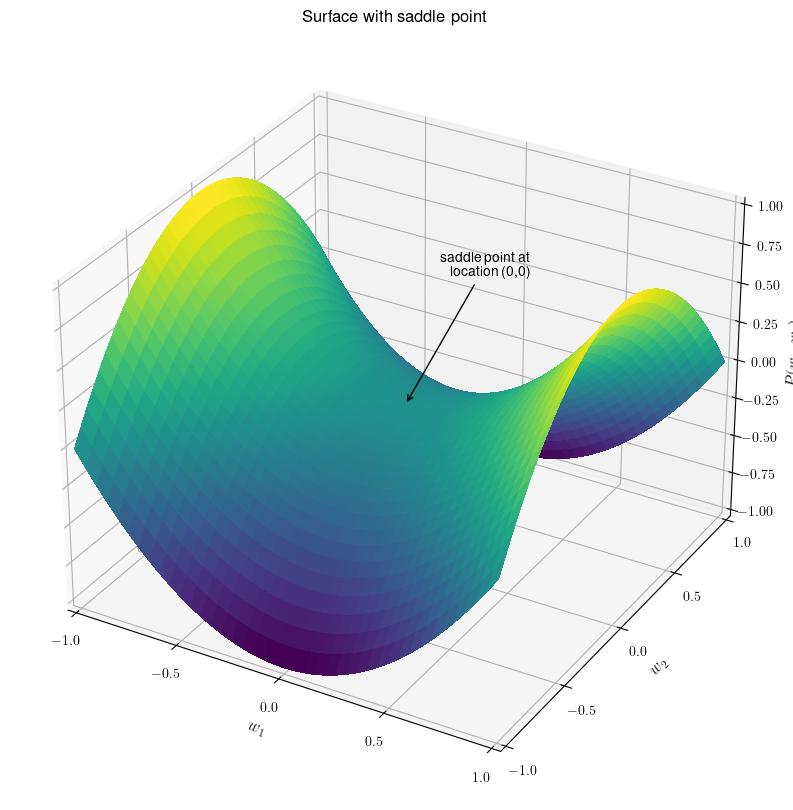

In [38]:
# Generate data for figure 2

x_values = np.arange(-1, 1.01, 0.01)
y_values = np.arange(-1, 1.01, 0.01)
X, Y = np.meshgrid(x_values, y_values)

f = np.zeros_like(X)
for i, x in enumerate(x_values):
    for j, y in enumerate(y_values):
        f[j, i] = x**2 - y**2 # a surface with saddle points

# Figure 2 (saddle plot)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(111, projection='3d')
S = ax.plot_surface(X, Y, f, cmap='viridis', linewidth=0, antialiased=False)
ax.set_xlabel(r'$w_1$', fontsize=12)
ax.set_ylabel(r'$w_2$', fontsize=12)
ax.set_zlabel(r'$P(w_1,w_2)$', fontsize=12)
ax.set_title('Surface with saddle point')
ax.set_xticks(np.arange(-1,1.5,0.5))
ax.set_xlim([-1,1])
ax.set_yticks(np.arange(-1,1.5,0.5))
ax.set_ylim([-1,1])


ax.annotate('saddle point at \n location (0,0)', xy= (0, 0), xytext= (0.03, 0.03), arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontweight='bold',ha='right', va='bottom')

**Figure 17.2** Plot of the function $P(w)=w_1^2-w_2^2$, which has a saddle point at location $w=(0,0)$.

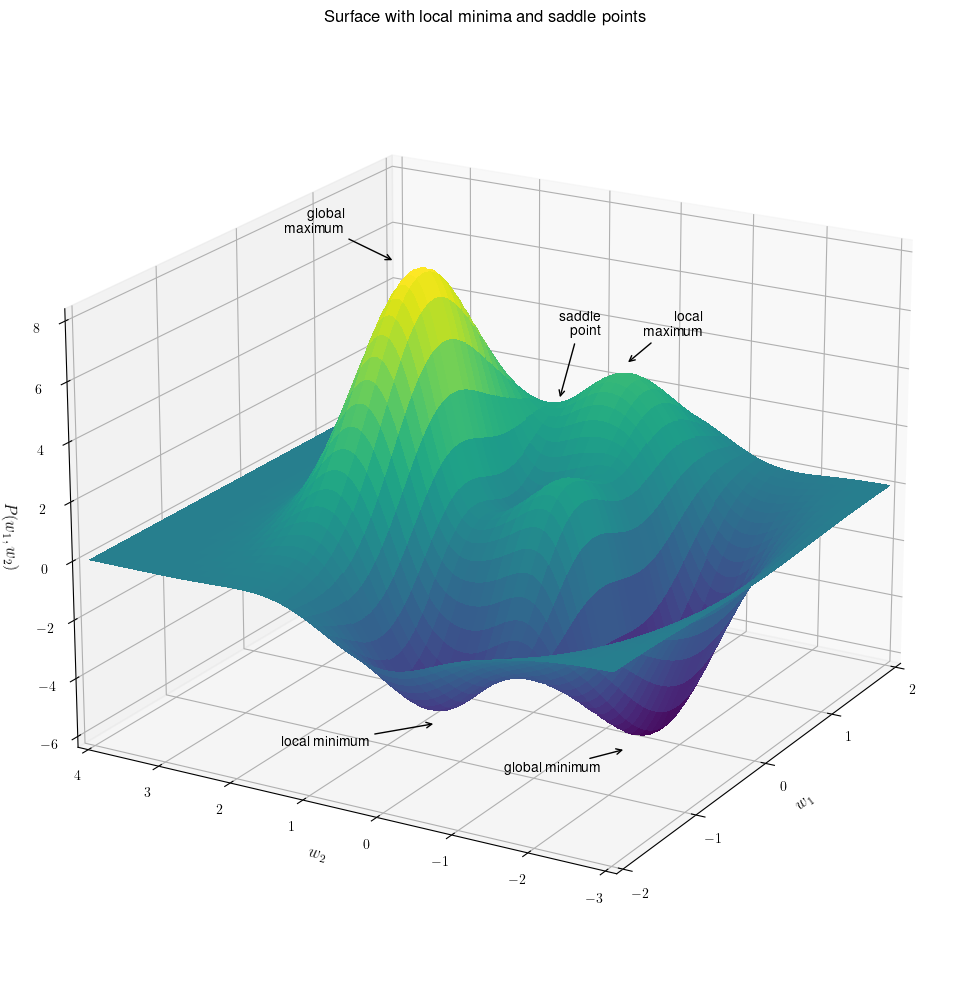

In [39]:
# Generate data for figure 3
x_values = np.arange(-2, 2.01, 0.01)
y_values = np.arange(-3, 4.01, 0.01)
X, Y = np.meshgrid(x_values, y_values)
h = np.zeros_like(X)

for i, x in enumerate(x_values):
    for j, y in enumerate(y_values):
        h[j, i] = 3*(1-x**2)*np.exp(-x**2-(y+1)**2) - (1/3)*np.exp(-(x+1)**2-y**2) - 10*((x/5)-x**3-y**5)*np.exp(-x**2-y**2) 
        # a third surface with local minim

# Figure 3 (risk function with multiple stationary points)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
S = ax.plot_surface(X, Y, h, cmap='viridis', linewidth=0, antialiased=False)
ax.set_xlabel(r'$w_1$', fontsize=12)
ax.set_ylabel(r'$w_2$', fontsize=12)
ax.set_zlabel(r'$P(w_1,w_2)$', fontsize=12)
ax.set_title('Surface with local minima and saddle points')
ax.view_init(elev=20, azim=-150) # change the axis orientation to fit the figure in the book
ax.set_xticks(np.arange(-2,3,1))
ax.set_xlim([-2,2])
ax.set_yticks(np.arange(-3,5,1))
ax.set_ylim([-3,4])

ax.annotate('global \n maximum', xy= (-0.02, 0.045), xytext= (-0.03, 0.05), arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontweight='bold',ha='right', va='bottom')
ax.annotate('local minimum', xy= (-0.012, -0.045), xytext= (-0.025, -0.05), arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontweight='bold',ha='right', va='bottom')
ax.annotate('global minimum', xy= (0.025, -0.05), xytext= (0.020, -0.055), arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontweight='bold',ha='right', va='bottom')
ax.annotate('saddle \n point', xy= (0.012, 0.018), xytext= (0.02, 0.03), arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontweight='bold',ha='right', va='bottom')
ax.annotate('local \n maximum', xy= (0.025, 0.025), xytext= (0.040, 0.03), arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontweight='bold',ha='right', va='bottom')


plt.tight_layout()
plt.show()

**Figure 17.3** Plot of a risk function with global and local maxima, global and local minima, as well as saddle points.

 Figure $17.2$ plots the risk function $P(w)=w_1^2-w_2^2$, which has a saddle point at location $w=(0,0)$; a saddle point is neither a local maximum nor a local minimum for the function. For instance, it is seen in  Fig. $17.2$ that the location $w=(0,0)$ is a maximum along the $w_1-$direction and a minimum along the $w_2-$direction. The gradient vector of the function will be zero at a saddle point, but the Hessian matrix will be indefinite. Figure $17.3$ shows a risk function with global and local maxima, global and local minima, as well as saddle points (such as the saddle point appearing between two "hills" on the surface of the plot). Since the algorithms described in this chapter will differ in the search directions they employ, some will be more successful than others in moving away from saddle points. For example, referring to the  plot in Fig. $17.2$, if a  gradient-descent implementation approaches the saddle point by taking steps along the $w_{2}-$direction, then it will end up assuming that it has reached a minimizer. The fact that the search directions are noisy will help inject some element of randomness into the update direction and consequently reduce the possibility of the algorithm continually updating along the $w_{2}-$direction toward the saddle point. 

## Example 17.5 (Logistic regression)

We repeat the simulations from Example $16.5$ and illustrate the operation of various adaptive gradient algorithms. Thus, consider again the $\ell_2-$regularized logistic regression empirical risk for which the gradient of the loss function is given by

$$
\nabla_{w^\top} Q(w;\gamma(n),h_n) = 2\rho w - \frac{\gamma(n) h_n}{1+e^{\gamma(n) h_n^\top w}}  \triangleq
 b_n \tag{17.75}
$$

We generate normalized learning curves  in logarithmic scale for a variety of algorithms,  including the vanilla stochastic gradient implementation, its momentum accelerated versions, and the adaptive gradient variations AdaGrad,  RMSprop, ADAM, AdaMax, AdaDelta, and Nadam. We employ uniform sampling and set the parameters to (it is recommended that the $\epsilon-$variable for AdaDelta be chosen between $1\times 10^{-2}$ and $1\times 10^{-5}$): 

$$
\begin{align*} &
\rho = 1, \quad \beta = 0.95, \quad \beta_1 = 0.9, \quad \beta_2 = 0.999, \quad M = 10 \tag{17.76a} \\ &
\mu = 0.005, \quad \mu_{\text{AdaGrad}} = 0.1 \tag{17.76b} \\ &
\epsilon = 1 \times 10^{-8}, \quad \epsilon_{\text{AdaDelta}} = 1 \times 10^{-4} \tag{17.76c}
\end{align*}
$$

with a larger step size for AdaGrad (otherwise, its convergence will be  slow). The simulation generates $N=100$ random pairs of data $\{\gamma(m),h_m\}$ according to the same logistic model explained earlier in Example $16.5$. A total of $K=50$ epochs are run over the data. We repeat this experiment $L=100$ times and average the corresponding learning curves, with each experiment starting from the same initial condition $\mathbf{w}_{-1}$.  The resulting learning curves are plotted in normalized logarithmic scale in line with construction ($11.56$), namely, 

$$
\ln\left(\frac{P(w_n)-P(w^\star)}{\max_{n}\{ P(w_n)-P(w^\star)\}}\right) \tag{17.77}
$$

where $w^{\star}$ is approximated by the limit value of the weight iterate after sufficient convergence. Each learning curve is generated by plotting the values of the risk function at the start of each epoch, namely, $P(w_{-1}^k)$. The plot in the top row of Fig. $17.5$ shows the evolution of these values relative to the minimum risk  $P(w^{\star})$ over the first $50$ epochs. It is seen from the plot in the top-left corner how the incorporation of momentum accelerates the convergence of the stochastic gradient iteration; the steady-state risk error   stays largely unaltered. The plot in the top-right corner shows how AdaGrad, RMSprop, and ADAM reduce the steady-state error in comparison with the stochastic gradient implementation; the convergence rate is, however, affected. The plot in the bottom-left corner compares different variations of ADAM, Nadam, AdaMax, and AdaDelta. The first two exhibit similar performance in this example, while AdaMax converges faster but tends to a higher error level. The plot in the bottom-right corner compares the performance of Nadam to accelerated versions of the stochastic gradient algorithm.

wait....generating data


100%|██████████| 100/100 [04:01<00:00,  2.41s/it]


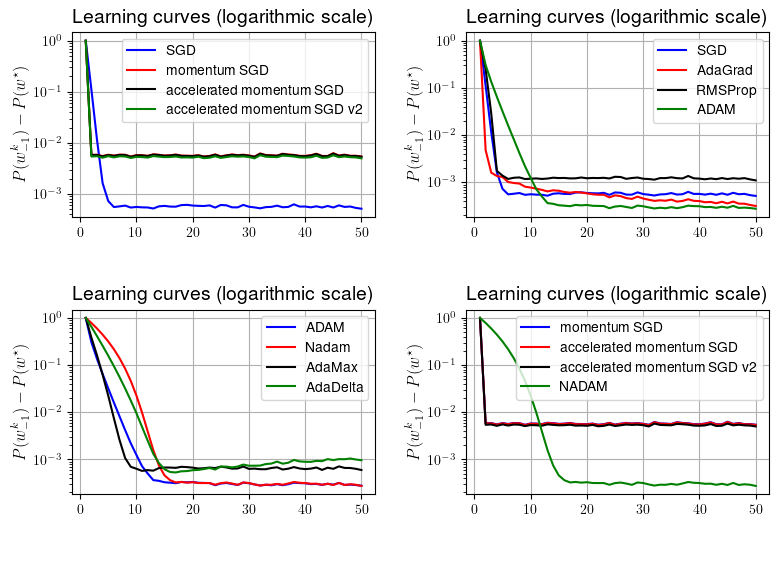

In [4]:
# l2-regularized logistic regression
# P(w) = rho\|w\|**2 + (1/N)sum_{n=0}^{N-1} ln(1+np.exp(-gamma(m) h_m' w))

rho = 1         # l2-regularization parameter
mu = 0.005      # step-size for stochastic gradient
mu_ADAGRAD = 20*mu

epsilon = 1e-8    # 
epsilon_adadelta = 1e-4 # ADADELTA
beta  = 0.9       # RMSprop
beta1 = 0.9       # ADAM
beta2 = 0.999     # ADAM
beta_delta = 0.99 # AdaDelta

M = 10   # feature size
N = 100  # number of data points 
K = 50   # number of epochs 
experiments = 100 

print('wait....generating data')

# Generating data and checking it
zo = np.random.randn(M).reshape(-1,1) # underlying parameter model for logistic data
p, gamma_vec, H = generate_logistic(N,zo,0) # logistic model with zero offset
ws, Ps, thetas  = logistic_minimizer(rho, gamma_vec, H,0) # learns ws only

PSGDmean      = np.zeros(K).reshape(-1,1) # learning curves over experiments
PADAGRADmean  = np.zeros(K).reshape(-1,1)
PADAMmean     = np.zeros(K).reshape(-1,1)
PRMSPROPmean  = np.zeros(K).reshape(-1,1)
PADADELTAmean = np.zeros(K).reshape(-1,1)
PADAMAXmean   = np.zeros(K).reshape(-1,1)
PNADAMmean    = np.zeros(K).reshape(-1,1)
PMSGDmean     = np.zeros(K).reshape(-1,1)
PAMSGDmean    = np.zeros(K).reshape(-1,1)
PAMSGD2mean   = np.zeros(K).reshape(-1,1)

winit = np.random.randn(M).reshape(-1,1) # initial condition for weight

for ell in tqdm(range(1, experiments + 1)):

    wSGD = winit  # initial condition for weight under uniform sampling
    wMSGD = winit  # momentum
    wAMSGD = winit  # accelerated momentum
    wAMSGD2 = winit
    wADAGRAD = winit
    wRMSPROP = winit
    wADAM = winit
    wADAMAX = winit
    wADADELTA = winit
    wNADAM = winit

    PSGD = np.zeros(K).reshape(-1,1)  # learning curves within each experiment
    PMSGD = np.zeros(K).reshape(-1,1)
    PAMSGD = np.zeros(K).reshape(-1,1)
    PAMSGD2 = np.zeros(K).reshape(-1,1)
    PADAGRAD = np.zeros(K).reshape(-1,1)
    PRMSPROP = np.zeros(K).reshape(-1,1)
    PADAM = np.zeros(K).reshape(-1,1)
    PADAMAX = np.zeros(K).reshape(-1,1)
    PADADELTA = np.zeros(K).reshape(-1,1)
    PNADAM = np.zeros(K).reshape(-1,1)

    sADAGRAD = np.zeros(M).reshape(-1,1)  # squared gradient vector
    sRMSPROP = np.zeros(M).reshape(-1,1)  # squared gradient vector
    sADADELTA = np.zeros(M).reshape(-1,1)  # squared gradient vector
    dADADELTA = np.zeros(M).reshape(-1,1)
    sADAM = np.zeros(M).reshape(-1,1)
    bADAM = np.zeros(M).reshape(-1,1)
    sNADAM = np.zeros(M).reshape(-1,1)
    bNADAM = np.zeros(M).reshape(-1,1)
    bADAMAX = np.zeros(M).reshape(-1,1)
    uADAMAX = np.zeros(M).reshape(-1,1)
    bMSGD = np.zeros(M).reshape(-1,1)
    bAMSGD = np.zeros(M).reshape(-1,1)
    bAMSGD2 = np.zeros(M).reshape(-1,1)
    
    for k in range(K): # iterating over runs
        # print(k) # epoch index
        for m in range(N) : # evaluating empirical risk function at START of each epoch
            
            h_m = H[:,m].reshape(-1,1) # feature vector
            gamma_m = gamma_vec[m] # label

            aSGD = 1+np.exp(-gamma_m* np.dot(h_m.T, wSGD) )
            PSGD[k] = PSGD[k] + np.log(aSGD)

            aMSGD = 1+np.exp(-gamma_m* np.dot(h_m.T, wMSGD) )
            PMSGD[k] = PMSGD[k] + np.log(aMSGD)

            aAMSGD = 1+np.exp(-gamma_m* np.dot(h_m.T, wAMSGD) )
            PAMSGD[k] = PAMSGD[k] + np.log(aAMSGD)

            aAMSGD2 = 1+np.exp(-gamma_m* np.dot(h_m.T, wAMSGD2) )
            PAMSGD2[k] = PAMSGD2[k] + np.log(aAMSGD2)

            aADAGRAD = 1+np.exp(-gamma_m* np.dot(h_m.T, wADAGRAD) )
            PADAGRAD[k] = PADAGRAD[k] + np.log(aADAGRAD)

            aADAM = 1+np.exp(-gamma_m* np.dot(h_m.T, wADAM) )
            PADAM[k] = PADAM[k] + np.log(aADAM)

            aNADAM = 1+np.exp(-gamma_m* np.dot(h_m.T, wNADAM) )
            PNADAM[k] = PNADAM[k] + np.log(aNADAM)

            aRMSPROP = 1+np.exp(-gamma_m* np.dot(h_m.T, wRMSPROP) )
            PRMSPROP[k] = PRMSPROP[k] + np.log(aRMSPROP)

            aADAMAX = 1+np.exp(-gamma_m* np.dot(h_m.T, wADAMAX) )
            PADAMAX[k] = PADAMAX[k] + np.log(aADAMAX)

            aADADELTA = 1+np.exp(-gamma_m* np.dot(h_m.T, wADADELTA) )
            PADADELTA[k] = PADADELTA[k] + np.log(aADADELTA)
 

        PSGD[k] = (1/N)*PSGD[k] #uniform sampling
        PSGD[k] = PSGD[k] + rho*np.linalg.norm(wSGD,2)**2 # risk  value at start of epoch k

        PMSGD[k] = (1/N)*PMSGD[k] #uniform sampling
        PMSGD[k] = PMSGD[k] + rho*np.linalg.norm(wMSGD,2)**2 # risk  value at start of epoch k

        PAMSGD[k] = (1/N)*PAMSGD[k] #uniform sampling
        PAMSGD[k] = PAMSGD[k] + rho*np.linalg.norm(wAMSGD,2)**2 # risk  value at start of epoch k

        PAMSGD2[k] = (1/N)*PAMSGD2[k] #uniform sampling
        PAMSGD2[k] = PAMSGD2[k] + rho*np.linalg.norm(wAMSGD2,2)**2 # risk  value at start of epoch k

        PADAGRAD[k] = (1/N)*PADAGRAD[k] #uniform sampling
        PADAGRAD[k] = PADAGRAD[k] + rho*np.linalg.norm(wADAGRAD,2)**2 # risk  value at start of epoch k

        PADAM[k] = (1/N)*PADAM[k] #uniform sampling
        PADAM[k] = PADAM[k] + rho*np.linalg.norm(wADAM,2)**2 # risk  value at start of epoch k

        PNADAM[k] = (1/N)*PNADAM[k] #uniform sampling
        PNADAM[k] = PNADAM[k] + rho*np.linalg.norm(wNADAM,2)**2 # risk  value at start of epoch k

        PRMSPROP[k] = (1/N)*PRMSPROP[k] #uniform sampling
        PRMSPROP[k] = PRMSPROP[k] + rho*np.linalg.norm(wRMSPROP,2)**2 # risk  value at start of epoch k

        PADAMAX[k] = (1/N)*PADAMAX[k] #uniform sampling
        PADAMAX[k] = PADAMAX[k] + rho*np.linalg.norm(wADAMAX,2)**2 # risk  value at start of epoch k

        PADADELTA[k] = (1/N)*PADADELTA[k] #uniform sampling
        PADADELTA[k] = PADADELTA[k] + rho*np.linalg.norm(wADADELTA,2)**2 # risk  value at start of epoch k


        for n in range(N) : # iterating over data in each epoch
            u = np.random.randint(0, N)  # uniform sampling
            h_u = H[:,u].reshape(-1,1) # feature vector
            gamma_u = gamma_vec[u] # label

            #SGD
            a = np.exp(- gamma_u* np.dot(h_u.T, wSGD) )
            g = gamma_u*h_u*a/(1+a) # - gradient of Q
            gSGD = 2*rho*wSGD - g
            wSGD = wSGD - mu*gSGD # updated w (stochastic gradient implementation)

            #momentum SGD
            a = np.exp(-gamma_u* np.dot(h_u.T, wMSGD) )
            g = gamma_u*h_u*a/(1+a) # - gradient of Q
            gMSGD = 2*rho*wMSGD - g
            bMSGD = beta*bMSGD + gMSGD
            wMSGD = wMSGD - mu*bMSGD # updated w (stochastic gradient implementation)

            # accelerated momentum SGD, version 1
            wbar = wAMSGD - mu*beta*bAMSGD
            a = np.exp(-gamma_u* np.dot(h_u.T, wbar) )
            g = gamma_u*h_u*a/(1+a) # - gradient of Q
            gAMSGD = 2*rho*wAMSGD - g
            bAMSGD = beta*bAMSGD + gAMSGD
            wAMSGD = wAMSGD - mu*bAMSGD # updated w (stochastic gradient implementation)

            # accelerated momentum SGD, version 3
            a = np.exp(-gamma_u* np.dot(h_u.T, wAMSGD2) )
            g = gamma_u*h_u*a/(1+a) # - gradient of Q
            gAMSGD2 = 2*rho*wAMSGD2 - g
            bAMSGD2 = beta*bAMSGD2 + gAMSGD2
            bx = beta*bAMSGD2 + gAMSGD2 
            wAMSGD2 = wAMSGD2 - mu*bx # updated w (stochastic gradient implementation)

            #ADAGRAD
            a = np.exp(-gamma_u * np.dot(h_u.T, wADAGRAD) )
            g = gamma_u*h_u*a/(1+a) # - gradient of Q
            gADAGRAD = 2*rho*wADAGRAD - g # full gradient
            sADAGRAD = sADAGRAD + hadamard_product(gADAGRAD, gADAGRAD)
            A = epsilon * np.eye(M) + np.diag(np.sqrt(sADAGRAD)[:,0])
            wADAGRAD = wADAGRAD - mu_ADAGRAD * np.dot(np.linalg.inv(A), gADAGRAD)

            #RMSPROP
            a = np.exp(-gamma_u* np.dot(h_u.T, wRMSPROP) )
            g = gamma_u*h_u*a/(1+a) # - gradient of Q
            gRMSPROP = 2*rho*wRMSPROP - g # full gradient
            sRMSPROP = beta*sRMSPROP + (1-beta)*hadamard_product(gRMSPROP,gRMSPROP)
            A = epsilon * np.eye(M) + np.diag(np.sqrt(sRMSPROP)[:,0])
            wRMSPROP = wRMSPROP - mu * np.dot(np.linalg.inv(A), gRMSPROP)

            #ADADELTA
            a = np.exp(-gamma_u* np.dot( h_u.T, wADADELTA) )
            g = gamma_u*h_u*a/(1+a) # - gradient of Q
            gADADELTA = 2*rho*wADADELTA - g # full gradient
            sADADELTA = beta_delta*sADADELTA + (1-beta_delta)*hadamard_product(gADADELTA,gADADELTA)
            A = epsilon_adadelta * np.eye(M) + np.diag(np.sqrt(sADADELTA)[:,0])
            D = epsilon_adadelta * np.eye(M) + np.diag(np.sqrt(dADADELTA)[:,0])
            wbefore = wADADELTA
            wADADELTA = wADADELTA - np.dot(D, np.dot(np.linalg.inv(A), gADADELTA))
            dw = wADADELTA - wbefore
            dADADELTA = beta_delta * dADADELTA + (1 - beta_delta) * hadamard_product(dw, dw)
                                              

            #ADAM
            a = np.exp(-gamma_u * np.dot(h_u.T, wADAM))
            g = gamma_u * h_u * a / (1 + a)  # - gradient of Q
            gADAM = 2 * rho * wADAM - g  # full gradient
            sADAM = beta2 * sADAM + (1 - beta2) * hadamard_product(gADAM, gADAM)
            bADAM = beta1 * bADAM + (1 - beta1) * gADAM
            A = epsilon * np.eye(M) + np.diag(np.sqrt(sADAM)[:,0])
            ss = np.sqrt(1 - beta2 ** (n+1)) / (1 - beta1 ** (n+1))
            wADAM = wADAM - mu * ss * np.dot(np.linalg.inv(A), bADAM)  # updated w (stochastic gradient implementation)


            #NADAM
            a = np.exp(-gamma_u * np.dot(h_u.T, wNADAM))
            g = gamma_u * h_u * a / (1 + a)  # - gradient of Q
            gNADAM = 2 * rho * wNADAM - g  # full gradient
            bNADAM = beta1 * bNADAM + (1 - beta1) * gNADAM
            bhat = beta1 * bNADAM + (1 - beta1) * gNADAM
            bhat /= 1 - (beta1 ** (n+1))
            sNADAM = beta1 * sNADAM + (1 - beta1) * hadamard_product(gNADAM, gNADAM)
            sNADAMx = sNADAM / (1 - (beta2 ** (n+1)))
            A = epsilon * np.eye(M) + np.diag(np.sqrt(sNADAMx)[:,0])
            wNADAM = wNADAM - mu * np.dot(np.linalg.inv(A), bhat)  # updated w (stochastic gradient implementation)

            #ADAMAX
                                              
            a = np.exp(-gamma_u * np.dot(h_u.T, wADAMAX))
            g = gamma_u * h_u * a / (1 + a)  # - gradient of Q
            gADAMAX = 2 * rho * wADAMAX - g  # full gradient
            bADAMAX = beta1 * bADAMAX + (1 - beta1) * gADAMAX
            uADAMAX = np.maximum(beta2 * uADAMAX, np.abs(gADAMAX))
            A = epsilon * np.eye(M) + np.diag(uADAMAX[:,0])
            ss = 1 / (1 - (beta1 ** (n+1)))
            wADAMAX = wADAMAX - mu * ss * np.dot(np.linalg.inv(A), gADAMAX)  # updated w (stochastic gradient implementation)


        # end of one epoch

    PSGDmean = PSGDmean + PSGD
    PMSGDmean = PMSGDmean + PMSGD
    PAMSGDmean = PAMSGDmean + PAMSGD
    PAMSGD2mean = PAMSGD2mean + PAMSGD2
    PADAGRADmean = PADAGRADmean + PADAGRAD
    PADAMAXmean = PADAMAXmean + PADAMAX
    PADADELTAmean = PADADELTAmean + PADADELTA
    PRMSPROPmean = PRMSPROPmean + PRMSPROP
    PADAMmean = PADAMmean + PADAM
    PNADAMmean = PNADAMmean + PNADAM



PSGDmean = PSGDmean/experiments
PMSGDmean = PMSGDmean/experiments
PAMSGDmean = PAMSGDmean/experiments
PAMSGD2mean = PAMSGD2mean/experiments
PADAGRADmean = PADAGRADmean/experiments
PADAMAXmean = PADAMAXmean/experiments
PADADELTAmean = PADADELTAmean/experiments
PRMSPROPmean = PRMSPROPmean/experiments
PADAMmean = PADAMmean/experiments
PNADAMmean = PNADAMmean/experiments
  
#print('limit points ws SGD MSGD AMSGD AMSGD2 ADAGRAD RMSPROP ADAM NADAM ADAMAX ADADELTA')
#print(ws, ',\n', wSGD, ',\n', wMSGD, ',\n', wAMSGD, ',\n', wAMSGD2, ',\n', wADAGRAD, ',\n', wRMSPROP, ',\n', 
#      wADAM, ',\n', wNADAM, ',\n', wADAMAX, ',\n', wADADELTA)


#print('mu beta beta1 beta2 beta_delta M N K experiments')
#print(mu, ',', beta, ',', beta1, ',', beta2, ',', M, ',', N, ',', K, ',', experiments)


#print('limit points ws SGD MSGD AMSGD AMSGD2 ADAGRAD RMSPROP ADAM NADAM ADAMAX ADADELTA')
#print(ws, ',\n', wSGD, ',\n', wMSGD, ',\n', wAMSGD, ',\n', wAMSGD2, ',\n', wADAGRAD, ',\n', wRMSPROP, ',\n', 
#      wADAM, ',\n', wNADAM, ',\n', wADAMAX, ',\n', wADADELTA)


#print('mu beta beta1 beta2 beta_delta M N K experiments')
#print(mu, ',', beta, ',', beta1, ',', beta2, ',', M, ',', N, ',', K, ',', experiments)

#figure 5 (comparing adaptive gradient algorithms)
                                              
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})
                                              
plt.figure(figsize=(9,6))

plt.subplot(221)
plt.semilogy(range(1, K + 1), abs(PSGDmean - Ps) / max(abs(PSGDmean - Ps)), '-b',
                   range(1, K + 1), abs(PMSGDmean - Ps) / max(abs(PMSGDmean - Ps)), '-r',
                   range(1, K + 1), abs(PAMSGDmean - Ps) / max(abs(PAMSGDmean - Ps)), '-k',
                   range(1, K + 1), abs(PAMSGD2mean - Ps) / max(abs(PAMSGD2mean - Ps)), '-g')

plt.xlabel('epock index $$k$$',fontsize=12)
plt.ylabel('$$P(w_{-1}^k) - P(w^\star)$$',fontsize=12)
plt.title('Learning curves (logarithmic scale)', fontsize=14)
plt.legend(['SGD', 'momentum SGD', 'accelerated momentum SGD', 'accelerated momentum SGD v2'])
plt.grid()
plt.axis('tight')
                                              
                                            
plt.subplot(222)
plt.semilogy(range(1, K + 1), abs(PSGDmean-Ps)/max(abs(PSGDmean-Ps)), '-b',
                   range(1, K + 1), abs(PADAGRADmean-Ps)/max(abs(PADAGRADmean-Ps)), '-r',
                   range(1, K + 1), abs(PRMSPROPmean-Ps)/max(abs(PRMSPROPmean-Ps)), '-k',
                   range(1, K + 1), abs(PADAMmean-Ps)/max(abs(PADAMmean-Ps)), '-g')

plt.xlabel('epock index $$k$$',fontsize=12)
plt.ylabel('$$P(w_{-1}^k) - P(w^\star)$$',fontsize=12)
plt.title('Learning curves (logarithmic scale)', fontsize=14)
plt.legend(['SGD','AdaGrad','RMSProp','ADAM'])
plt.grid()
plt.axis('tight')
                                              
                                              
plt.subplot(223)
plt.semilogy(range(1, K + 1), abs(PADAMmean-Ps)/max(abs(PADAMmean-Ps)), '-b',
                   range(1, K + 1), abs(PNADAMmean-Ps)/max(abs(PNADAMmean-Ps)), '-r',
                   range(1, K + 1), abs(PADAMAXmean-Ps)/max(abs(PADAMAXmean-Ps)), '-k',
                   range(1, K + 1), abs(PADADELTAmean-Ps)/max(abs(PADADELTAmean-Ps)), '-g')

plt.xlabel('epock index $$k$$',fontsize=12)
plt.ylabel('$$P(w_{-1}^k) - P(w^\star)$$',fontsize=12)
plt.title('Learning curves (logarithmic scale)', fontsize=14)
plt.legend(['ADAM','Nadam','AdaMax','AdaDelta'])
plt.grid()
plt.axis('tight')
                                              
                                        
plt.subplot(224)
plt.semilogy(range(1, K + 1), abs(PMSGDmean-Ps)/max(abs(PMSGDmean-Ps)), '-b',
                   range(1, K + 1), abs(PAMSGDmean-Ps)/max(abs(PAMSGDmean-Ps)), '-r',
                   range(1, K + 1), abs(PAMSGD2mean-Ps)/max(abs(PAMSGD2mean-Ps)), '-k',
                   range(1, K + 1), abs(PNADAMmean-Ps)/max(abs(PNADAMmean-Ps)), '-g')

plt.xlabel('epock index $$k$$',fontsize=12)
plt.ylabel('$$P(w_{-1}^k) - P(w^\star)$$',fontsize=12)
plt.title('Learning curves (logarithmic scale)', fontsize=14)
plt.legend(['momentum SGD','accelerated momentum SGD','accelerated momentum SGD v2','NADAM'])
plt.grid()
plt.axis('tight')

plt.subplots_adjust(wspace=  0.3, hspace=0.5)
plt.savefig('fig5-ch17.pdf', format='pdf')
plt.show()

**Figure 17.5** (*Top-left*) Learning curves $P(w_{-1}^k)$ relative to the minimum risk value $P(w^{\star})$ in normalized logarithmic scale for the stochastic-gradient implementation and its momentum accelerated versions. (*Top-right*)
Learning curves  for the stochastic-gradient implementation (SGD), AdaGrad, RMSprop, and ADAM. (*Bottom-left*) Learning curves for ADAM, AdaMax, AdaDelta, and Nadam. (*Bottom-right*) Learning curves for the stochastic gradient with momentum accelerated versions as well.

## Example 17.7 (Logistic Regression)

We illustrate the operation of the federated averaging algorithm by repeating the simulations of Example $17.5$ involving an $\ell_2-$ regularized logistic regression empirical risk problem. We employ uniform sampling and set the parameters to: 

$$
\rho=1, \quad \mu=1, \quad M=10, \quad L=20, \quad N_{\ell}=200=R_{\ell}, \quad N=4000, \quad B=5 \tag{17.94}
$$

We also assume that at each cycle $n$ the server selects four random clients (i.e., the cardinality of the subset ${\cal L}_n$ is $|{\cal L}_n|=4$). We assume each agent runs $K_{\ell}=50$ epochs, and we repeat the simulation over $50$ cycles (i.e., for $n=1,2,\ldots,50$). In order  to generate a smooth learning curve, we average the risk error function over five experiments, with each experiment starting from the same initial condition $\mathbb{w}_{-1}$ for the weight at the server.  The resulting learning curve is plotted in normalized logarithmic scale in line with construction
($11.65$), namely, 

$$
\ln\left(\frac{P(w_n)-P(w^\star)}{\max_{n}\{ P(w_n)-P(w^\star)\}}\right) \tag{17.95}
$$

where $w^{\star}$ is approximated by the limit value of the weight iterate after sufficient convergence. The learning curve is generated by plotting the value of the risk function at the start of each cycle.  Figure $17.7$ illustrates the evolution of the learning curve for this example. 

In [4]:
########### THIS PART DOES NOT WORK CORRECTLY BUT I WAS UNABLE TO FIND THE PROBLEM ###############################



# l2-regularized logistic regression
# P(w) = rho\|w\|^2 + (1/N)sum_{n=0}^{N-1} ln(1+exp(-gamma(m) h_m' w))

rho = 1          # l2-regularization parameter
mu = 1           # step-size for stochastic gradient

L = 20     # number of devices
S = 4      # size of random subsets selected by server at each cycle
M = 10     # feature size
Nell = 200 # data points at each device
N = Nell*L # total number of data points
K = 50     # number of epochs run by each agent
B = 5      # batch size at each agent
C = 50     # number of cycles run by server
experiments = 5 # number of experiments to average results

print('wait....generating data');

# Generating data and checking it
zo = np.random.rand(M).reshape(-1,1) # underlying parameter model for logistic data
p, gamma_vec, H = generate_logistic(N,zo,0) # logistic model with zero offset
ws, Ps, thetas  = logistic_minimizer(rho, gamma_vec, H,0) # learns ws only

wait....generating data


In [26]:
Hdist = []       # Dictionary for features at agents; each key corresponds to an ell value
gammadist = []   # Dictionary for labels at agents; each key corresponds to an ell value

for ell in range(1, L+1):
    H_new = H[:, Nell*(ell-1):ell*Nell]
    Hdist.append(H_new)
    gamma_new = gamma_vec[Nell*(ell-1):ell*Nell]
    gammadist.append(gamma_new)


P       = np.zeros(C)  # learning curve over cycles
Pmean   = np.zeros(C)   # average learning curve over experiments
wagents = np.zeros((M,L))   # weight vectors at agents; one column per agent
wserver = np.random.randn(M)   # initial condition for weight at server; changes by experiment


gamma_vec = gamma_vec.reshape(-1)
for ex in range(experiments):
    print("Experiment:", ex)
    for c in tqdm(range(C)): # repeat of cycles
        for m in range(N): # evaluating empirical risk function at cycle c
            h_m = H[:, m] # Feature vector
            gamma_m = gamma_vec[m] # Label
            a = 1 + np.exp(-gamma_m * h_m@wserver)
            P[c] += np.log(a)
        
        P[c] = (1 / N) * P[c]
        P[c] += rho * np.linalg.norm(wserver, 2)**2 # risk  value at start of cycle c
        
        subsetS = np.random.choice(L, S, replace=False) # Select S random agents from set L
        
        for ell in range(S): # iterate over selected agents
            agent_index = subsetS[ell]
            w_agent = wserver.copy()
            H_agent = Hdist[agent_index].copy()
            gamma_agent = gammadist[agent_index].reshape(-1)
            
            for k in range(K): #repeat K runs by the selected agent
                for n in range(Nell):
                    U = np.random.choice(Nell, B, replace=False) # B random samples from data at this agent
                    sbatch = 0
                    for b in range(B):
                        h_b = H_agent[:, U[b]] # Feature vector
                        gamma_b = gamma_agent[U[b]] # Label
                        abatch = np.exp(-gamma_b * h_b@w_agent)
                        sbatch += gamma_b * h_b * abatch / (1 + abatch) # Gradient vector
                    
                    sbatch /= B # Gradient vector for batch implementation
                    mu_actual = mu / (K * Nell)
                    w_agent = (1 - 2 * mu_actual * rho) * w_agent + mu_actual * sbatch # Updated w (stochastic mini-batch implementation)
            
            wagents[:, agent_index] = w_agent.copy() # Save iterate for the agent
        
        NL = Nell * S
        wserver = np.zeros(M)
        for ell in range(S):
            agent_index = subsetS[ell]
            wserver += ( (Nell / NL) * wagents[:, agent_index] )
        
    Pmean += P

Pmean /= experiments

Experiment: 0


100%|██████████| 50/50 [02:17<00:00,  2.76s/it]


Experiment: 1


100%|██████████| 50/50 [02:20<00:00,  2.81s/it]


Experiment: 2


100%|██████████| 50/50 [02:49<00:00,  3.39s/it]


Experiment: 3


100%|██████████| 50/50 [02:57<00:00,  3.55s/it]


Experiment: 4


100%|██████████| 50/50 [02:33<00:00,  3.08s/it]


mu rho L S M Nell N K C B
1 , 1 , 20 , 4 , 10 , 200 , 4000 , 50 , 50 , 5


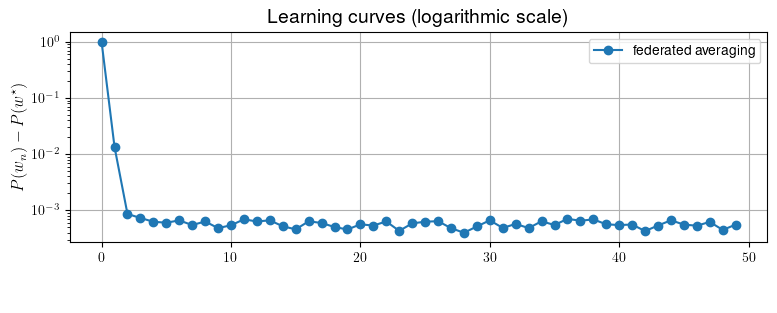

In [27]:
print('mu rho L S M Nell N K C B')
print(mu, ',', rho, ',', L, ',', S, ',', M, ',', Nell, ',', N, ',', K, ',', C, ',', B)


#figure 7 (learning curve for federated learning)
                                              
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})
                                              
plt.figure(figsize=(9,6))

plt.subplot(211)
plt.semilogy(range(C), abs((Pmean - Ps).reshape(-1)) / max(abs((Pmean - Ps).reshape(-1))), '-o')
plt.xlabel('cycle index $$n$$',fontsize=12)
plt.ylabel('$$P(w_n) - P(w^\star)$$',fontsize=12)
plt.title('Learning curves (logarithmic scale)', fontsize=14)
plt.legend(['federated averaging'])
plt.grid()
plt.axis('tight')

plt.show()

**Figure 17.7** Learning curve $P(w_{n})$ relative to the minimum risk value $P(w^{\star})$ in normalized logarithmic scale over the first $25$ cycles for the federated averaging  algorithm.